## Imports

In [1]:
import numpy as np
from IPython.display import Image
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

## Set a fixed random seed value

In [2]:
seed = np.random.seed(1)

## Question-1

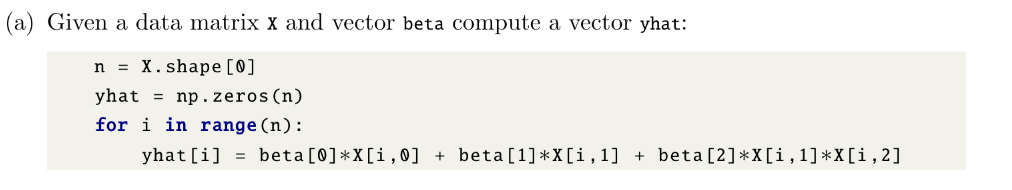

In [3]:
Image(filename="question-1.png", width=800, height=400)

## Prepare sample data and parameters

In [4]:
def prepare_data(data_size):
    X = np.random.random((data_size, 3))
    y = np.random.random((data_size, ))
    
    return X, y

In [5]:
X, y = prepare_data(data_size=150)

In [6]:
beta = np.random.random((3,))

## Non-vectorized version

In [7]:
def non_vect(X, y, beta):
    n = X.shape[0]
    yhat = np.zeros(n)
    
    for i in range(n):
        yhat[i] = beta[0]*X[i, 0] + beta[1]*X[i, 1] + beta[2]*X[i, 1]*X[i, 2]
    
    return yhat

In [8]:
yhat = non_vect(X, y, beta)

## Vectorized version

In [9]:
def vect(X, y, beta):
    n = X.shape[0]
    yhat = np.zeros(n)
    
    yhat_vect = beta[0]*X[:, 0] + beta[1] * X[:, 1] + beta[2]*X[:, 1]*X[:, 2]
    return yhat_vect

In [10]:
yhat_vect = vect(X, y, beta)

## Sanity check

In [11]:
yhat == yhat_vect

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Benchmarking

In [12]:
UPTO_POWER_OF_TWO = 25

In [13]:
def benchmark(upto, beta, function):
    
    benchmark_dict = {}
    
    for i in range(1, upto):
        
        data_size = 2**i
        X, y = prepare_data(data_size=data_size)
        print("On iteration: {}, data_size: {}".format(i, data_size))
        
        start = time.time()
        function(X, y, beta)
        end = time.time()
        
        benchmark_dict[i] = end-start
    
    return benchmark_dict

In [14]:
non_vect_benchmark_dict = benchmark(upto=UPTO_POWER_OF_TWO, beta=beta, function=non_vect)

On iteration: 1, data_size: 2
On iteration: 2, data_size: 4
On iteration: 3, data_size: 8
On iteration: 4, data_size: 16
On iteration: 5, data_size: 32
On iteration: 6, data_size: 64
On iteration: 7, data_size: 128
On iteration: 8, data_size: 256
On iteration: 9, data_size: 512
On iteration: 10, data_size: 1024
On iteration: 11, data_size: 2048
On iteration: 12, data_size: 4096
On iteration: 13, data_size: 8192
On iteration: 14, data_size: 16384
On iteration: 15, data_size: 32768
On iteration: 16, data_size: 65536
On iteration: 17, data_size: 131072
On iteration: 18, data_size: 262144
On iteration: 19, data_size: 524288
On iteration: 20, data_size: 1048576
On iteration: 21, data_size: 2097152
On iteration: 22, data_size: 4194304
On iteration: 23, data_size: 8388608
On iteration: 24, data_size: 16777216


In [15]:
vect_benchmark_dict = benchmark(upto=UPTO_POWER_OF_TWO, beta=beta, function=vect)

On iteration: 1, data_size: 2
On iteration: 2, data_size: 4
On iteration: 3, data_size: 8
On iteration: 4, data_size: 16
On iteration: 5, data_size: 32
On iteration: 6, data_size: 64
On iteration: 7, data_size: 128
On iteration: 8, data_size: 256
On iteration: 9, data_size: 512
On iteration: 10, data_size: 1024
On iteration: 11, data_size: 2048
On iteration: 12, data_size: 4096
On iteration: 13, data_size: 8192
On iteration: 14, data_size: 16384
On iteration: 15, data_size: 32768
On iteration: 16, data_size: 65536
On iteration: 17, data_size: 131072
On iteration: 18, data_size: 262144
On iteration: 19, data_size: 524288
On iteration: 20, data_size: 1048576
On iteration: 21, data_size: 2097152
On iteration: 22, data_size: 4194304
On iteration: 23, data_size: 8388608
On iteration: 24, data_size: 16777216


## Plot

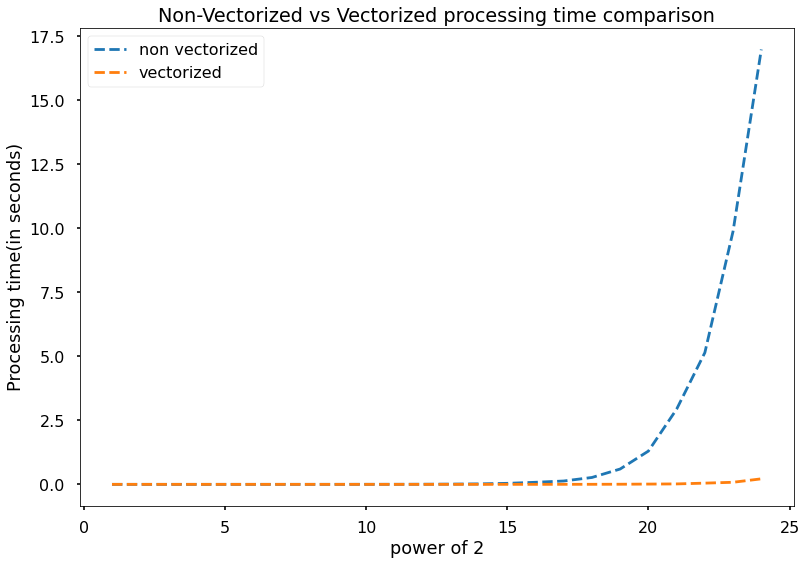

In [16]:
x1 = list(non_vect_benchmark_dict.keys())
y1 = list(non_vect_benchmark_dict.values())

x2 = list(vect_benchmark_dict.keys())
y2 = list(vect_benchmark_dict.values())

plt.title('Non-Vectorized vs Vectorized processing time comparison')
plt.xlabel('power of 2')
plt.ylabel('Processing time(in seconds)')
plt.plot(x1, y1, '--', x2, y2, '--');
plt.legend(('non vectorized', 'vectorized'), loc='upper left');

___